- ongoing

# Weighted Loss  : $(y-\hat{y}) (y-\hat{y})^\top \odot W$

## Import

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'

import torch
import eptstgcn
import eptstgcn.planner

In [2]:
class Loader(eptstgcn.DatasetLoader):
    def __init__(self,data_dict):
         self._dataset = data_dict 

## Data

In [221]:
solar.shape

(2568, 10)

In [3]:
# solar dataset
solar_ = pd.read_csv('./data2/restructuring_data.csv')
solar = solar_[['포항','대구','부산','경주시','청송군','서울','인천','수원','서산','창원']]
# solar = solar.drop('date', axis=1)

In [4]:
N = 10 # number of nodes
T = solar.shape[0]
node_ids = solar.columns.tolist()

In [5]:
FX_ = [solar.iloc[i,:] for i in range(T)]
FX = np.stack(FX_).tolist()

In [6]:
W = np.eye(N)
W[:(N-5),:(N-5)] = 1
W2 = np.eye(N)

In [7]:
data_dict1={
    'edges':[[i,j] for i in range(N) for j in range(N)], 
    'node_ids': {node_ids[i]: i for i in range(N)}, 
    'weights':W.reshape(-1).tolist(),
    'FX':FX
}
data_dict2={
    'edges':[[i,j] for i in range(N) for j in range(N)], 
    'node_ids': {node_ids[i]: i for i in range(N)}, 
    'weights':W2.reshape(-1).tolist(), 
    'FX':FX
}
# data_dict3={
#     'edges':[[i,j] for i in range(N) for j in range(N)], 
#     'node_ids': {node_ids[i]: i for i in range(N)}, 
#     'weights':W2.reshape(-1).tolist(), 
#     'FX':FX
# }

In [8]:
np.matrix(W)

matrix([[1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [9]:
import itertools

In [10]:
list(itertools.product(np.matrix(W)))

[(matrix([[1., 1., 1., 1., 1., 0., 0., 0., 0., 0.]]),),
 (matrix([[1., 1., 1., 1., 1., 0., 0., 0., 0., 0.]]),),
 (matrix([[1., 1., 1., 1., 1., 0., 0., 0., 0., 0.]]),),
 (matrix([[1., 1., 1., 1., 1., 0., 0., 0., 0., 0.]]),),
 (matrix([[1., 1., 1., 1., 1., 0., 0., 0., 0., 0.]]),),
 (matrix([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]]),),
 (matrix([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]]),),
 (matrix([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]]),),
 (matrix([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]]),),
 (matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]),)]

## loader -> learn

### lag=1, filters=2, epoch=30

In [11]:
loader = Loader(data_dict1) # arbitrary weights
loader2 = Loader(data_dict2) # identity matrix
# train_dataset1, test_dataset1 = eptstgcn.utils.temporal_signal_split(dataset1, train_ratio = 0.9)
# train_dataset2, test_dataset2 = eptstgcn.utils.temporal_signal_split(dataset2, train_ratio = 0.9)
# lrnr1 = eptstgcn.WeightedLossStgcnLeaner(train_dataset1, dataset_name = 'arbitarary weights')
# lrnr2 = eptstgcn.WeightedLossStgcnLeaner(train_dataset2, dataset_name = 'Identity matrix')

In [24]:
plans_stgcn = {
    'max_iteration': 10,  
    'method': ['Weighted Loss'],
    'W':W,
    'lags': [1], 
    'nof_filters':[2], 
    'epoch': [30] 
}

In [25]:
plans_stgcn2 = {
    'max_iteration': 10,  
    'method': ['Weighted Loss'],
    'W':W2,
    'lags': [1], 
    'nof_filters':[2], 
    'epoch': [30] 
}

In [37]:
plans_stgcn3 = {
    'max_iteration': 10,  
    'method': ['original Loss'],
    'lags': [1], 
    'nof_filters':[2], 
    'epoch': [30] 
} 

In [67]:
plans_stgcn4 = {
    'max_iteration': 10,  
    'method': ['original Loss'],
    'lags': [1], 
    'nof_filters':[2], 
    'epoch': [30] 
}

In [66]:
plnr3 = eptstgcn.planner.PLNR_STGCN(plans_stgcn3, loader2, dataset_name = 'identity matrix weights') # original loss, identity matrix weights

In [70]:
plnr4 = eptstgcn.planner.PLNR_STGCN(plans_stgcn4, loader, dataset_name = 'arbitrary weights') # original loss, arbitrary matrix weights

In [26]:
plnr1 = eptstgcn.planner.PLNR_STGCN2(plans_stgcn,loader,dataset_name= 'arbitrary weights')
plnr2 = eptstgcn.planner.PLNR_STGCN2(plans_stgcn2, loader2, dataset_name= 'identity matrix weights')

# plnr1_2 = eptstgcn.planner.PLNR_STGCN2(plans_stgcn,loader,dataset_name= 'arbitrary weights')
# plnr2_2 = eptstgcn.planner.PLNR_STGCN2(plans_stgcn2, loader2, dataset_name= 'identity matrix weights') 

# plnr1_3 = eptstgcn.planner.PLNR_STGCN2(plans_stgcn,loader,dataset_name= 'arbitrary weights')
# plnr2_3 = eptstgcn.planner.PLNR_STGCN2(plans_stgcn2, loader2, dataset_name= 'identity matrix weights') 

In [27]:
plnr1.simulate(w=W) # arbitrary weights
plnr2.simulate(w=W2) # identity matrix

1/10 is done
2/10 is done
3/10 is done
4/10 is done
5/10 is done
6/10 is done
7/10 is done
8/10 is done
9/10 is done
10/10 is done
All results are stored in ./simulation_results/2023-07-02_17-24-37.csv
1/10 is done
2/10 is done
3/10 is done
4/10 is done
5/10 is done
6/10 is done
7/10 is done
8/10 is done
9/10 is done
10/10 is done
All results are stored in ./simulation_results/2023-07-02_17-47-41.csv


In [39]:
plnr3.simulate()

1/10 is done
2/10 is done
3/10 is done
4/10 is done
5/10 is done
6/10 is done
7/10 is done
8/10 is done
9/10 is done
10/10 is done
All results are stored in ./simulation_results2/2023-07-02_18-22-25.csv


In [71]:
plnr4.simulate()

1/10 is done
2/10 is done
3/10 is done
4/10 is done
5/10 is done
6/10 is done
7/10 is done
8/10 is done
9/10 is done
10/10 is done
All results are stored in ./simulation_results2/2023-07-02_19-09-07.csv


In [29]:
plnr1.simulation_results # weighted loss, arbitrary weights

,dataset,method,W,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
0,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,0.996373,0.838847,133.744787
1,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,0.190612,0.156304,134.084418
2,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,0.996373,0.838847,133.860929
3,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,0.173063,0.137477,133.72133
4,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,0.173172,0.1376,133.998566
5,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,0.996373,0.838847,134.028047
6,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,0.184484,0.150301,133.976169
7,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,0.190612,0.156304,133.935032
8,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,0.190611,0.156304,134.194971
9,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,0.167219,0.130834,134.157138


In [30]:
plnr2.simulation_results # weighted loss, identity matrix weights

,dataset,method,W,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
0,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,0.152525,0.122985,134.150389
1,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,0.15434,0.124205,133.731789
2,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,0.15434,0.124205,134.041934
3,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,0.15434,0.124205,133.956669
4,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,0.152481,0.122964,134.233366
5,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,0.154341,0.124206,134.079413
6,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,0.15434,0.124205,134.210229
7,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,0.15257,0.123026,134.110708
8,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,0.15434,0.124205,134.027341
9,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,1.005965,0.839139,134.200187


In [40]:
plnr3.simulation_results # original loss, identity matrix weights

,dataset,method,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
0,identity matrix weights,original Loss,1,2,30,0.152569,0.123012,133.653651
1,identity matrix weights,original Loss,1,2,30,0.154342,0.124206,133.698485
2,identity matrix weights,original Loss,1,2,30,0.152271,0.122776,133.861741
3,identity matrix weights,original Loss,1,2,30,0.15226,0.122781,133.69377
4,identity matrix weights,original Loss,1,2,30,1.005965,0.839139,133.906698
5,identity matrix weights,original Loss,1,2,30,1.005965,0.839139,133.752092
6,identity matrix weights,original Loss,1,2,30,1.005965,0.839139,133.948434
7,identity matrix weights,original Loss,1,2,30,0.154341,0.124205,133.895249
8,identity matrix weights,original Loss,1,2,30,1.005965,0.839139,134.015502
9,identity matrix weights,original Loss,1,2,30,0.153802,0.123775,133.700334


In [72]:
plnr4.simulation_results # original loss, arbitrary weights

,dataset,method,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
0,arbitrary weights,original Loss,1,2,30,0.153857,0.125518,133.497958
1,arbitrary weights,original Loss,1,2,30,0.154481,0.124609,133.633263
2,arbitrary weights,original Loss,1,2,30,1.005965,0.839139,133.701238
3,arbitrary weights,original Loss,1,2,30,1.005965,0.839139,133.678794
4,arbitrary weights,original Loss,1,2,30,0.154481,0.124609,133.771027
5,arbitrary weights,original Loss,1,2,30,0.154481,0.124609,133.986456
6,arbitrary weights,original Loss,1,2,30,0.154481,0.124609,133.650357
7,arbitrary weights,original Loss,1,2,30,0.154481,0.124609,133.876408
8,arbitrary weights,original Loss,1,2,30,0.154481,0.124609,133.873952
9,arbitrary weights,original Loss,1,2,30,1.005965,0.839139,133.924529


In [30]:
np.arrsimulation_resultse

(2568, 10)

- lags와 W 바뀜..

### MSE 비교

In [89]:
rslt1 = pd.read_csv('./simulation_results/2023-07-02_17-24-37.csv')
rslt2 = pd.read_csv('./simulation_results/2023-07-02_17-47-41.csv')
rslt3 = pd.read_csv('./simulation_results2/2023-07-02_18-22-25.csv')
rslt4 = pd.read_csv('./simulation_results2/2023-07-02_19-09-07.csv')

`-` weighted loss

In [90]:
rslt1.groupby(['nof_filters'])\
             .agg({'mse(train)':['mean', 'var'], 'mse(test)':['mean','var']}) # arbitrary weights & weighted loss

mse(train)           mse(test)          
                  mean       var      mean       var
nof_filters                                         
2             0.425889  0.155044  0.354167  0.111943

In [92]:
rslt2.groupby(['nof_filters']).agg({'mse(train)':['mean', 'var'], 'mse(test)':['mean','var']})  # identity matrix weights & weighted loss

mse(train)          mse(test)          
                  mean      var      mean       var
nof_filters                                        
2             0.238958  0.07263  0.195335  0.051171

`-` original loss

In [94]:
rslt4.groupby(['nof_filters']).agg({'mse(train)':['mean', 'var'], 'mse(test)':['mean','var']}) # arbitrary weights & original loss

mse(train)           mse(test)          
                  mean       var      mean       var
nof_filters                                         
2             0.409864  0.169208  0.339059  0.119086

In [93]:
rslt3.groupby(['nof_filters']).agg({'mse(train)':['mean', 'var'], 'mse(test)':['mean','var']}) # identity matrix weights & original loss

mse(train)           mse(test)          
                  mean       var      mean       var
nof_filters                                         
2             0.494345  0.193894  0.409731  0.136586

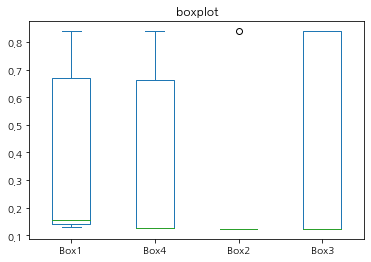

In [100]:
# Pandas dataframe
data = pd.DataFrame({"Box1": rslt1['mse(test)'], "Box4": rslt4['mse(test)'], "Box2": rslt2['mse(test)'], "Box3": rslt3['mse(test)']})

# Plot the dataframe
ax = data[['Box1', 'Box4', 'Box2', 'Box3']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

## Summary

- arbitrary weights을 준 경우 original loss일 때 test set의 평균 MSE 값이 더 작게 나타남.
- identity matrix weights을 준 경우 original loss($0.409731$)일 때보다 weighted loss($0.195335$)에서의  test set에서의 평균 MSE 값이 훨씬 작게 나타남.

- $MSE_{test}: MSE_{weighted} < MSE_{origin}$

$\text{arbitrary weights}=\begin{bmatrix} 1 & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 \\  1 & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 \\  1 & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 \\  1 & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 \\  1 & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 \\  0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1 \\ 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1 \\ 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1 \\ 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1 \\ 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1\end{bmatrix}$

$\text{identity weights} = \begin{bmatrix} 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\  0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\  0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\end{bmatrix}$

$\text{Weighted Loss} = \frac{1}{N}\{(y-\hat{y}) (y-\hat{y})^\top \odot W\}, \quad N = \text{number of nodes}$

$\text{Original Loss} = \frac{1}{N}\{(y-\hat{y}) (y-\hat{y})^\top\}, \quad N = \text{number of nodes}$

- node 선정을 잘못했나?? 노드 수 8개로 줄여서 다시 돌려보자..
- 필터 수 늘려서도 돌려보자.

---

### lag=1, filters=16, epoch=30

In [101]:
loader = Loader(data_dict1) # arbitrary weights
loader2 = Loader(data_dict2) # identity matrix
# train_dataset1, test_dataset1 = eptstgcn.utils.temporal_signal_split(dataset1, train_ratio = 0.9)
# train_dataset2, test_dataset2 = eptstgcn.utils.temporal_signal_split(dataset2, train_ratio = 0.9)
# lrnr1 = eptstgcn.WeightedLossStgcnLeaner(train_dataset1, dataset_name = 'arbitarary weights')
# lrnr2 = eptstgcn.WeightedLossStgcnLeaner(train_dataset2, dataset_name = 'Identity matrix')

In [102]:
plans_stgcn = {
    'max_iteration': 10,  
    'method': ['Weighted Loss'],
    'W':W,
    'lags': [1], 
    'nof_filters':[16], 
    'epoch': [30] 
}

In [103]:
plans_stgcn2 = {
    'max_iteration': 10,  
    'method': ['Weighted Loss'],
    'W':W2,
    'lags': [1], 
    'nof_filters':[16], 
    'epoch': [30] 
}

In [104]:
plans_stgcn3 = {
    'max_iteration': 10,  
    'method': ['original Loss'],
    'lags': [1], 
    'nof_filters':[16], 
    'epoch': [30] 
} 

In [105]:
plans_stgcn4 = {
    'max_iteration': 10,  
    'method': ['original Loss'],
    'lags': [1], 
    'nof_filters':[16], 
    'epoch': [30] 
}

In [106]:
plnr1_ = eptstgcn.planner.PLNR_STGCN2(plans_stgcn,loader,dataset_name= 'arbitrary weights')
plnr2_ = eptstgcn.planner.PLNR_STGCN2(plans_stgcn2, loader2, dataset_name= 'identity matrix weights')
plnr3_ = eptstgcn.planner.PLNR_STGCN(plans_stgcn3, loader2, dataset_name = 'identity matrix weights') # original loss, identity matrix weights
plnr4_ = eptstgcn.planner.PLNR_STGCN(plans_stgcn4, loader, dataset_name = 'arbitrary weights') # original loss, arbitrary matrix weights

In [107]:
plnr1_.simulate(w=W) # arbitrary weights
plnr2_.simulate(w=W2) # identity matrix
plnr3_.simulate()
plnr4_.simulate()

1/10 is done
2/10 is done
3/10 is done
4/10 is done
5/10 is done
6/10 is done
7/10 is done
8/10 is done
9/10 is done
10/10 is done
All results are stored in ./simulation_results/2023-07-02_21-38-50.csv
1/10 is done
2/10 is done
3/10 is done
4/10 is done
5/10 is done
6/10 is done
7/10 is done
8/10 is done
9/10 is done
10/10 is done
All results are stored in ./simulation_results/2023-07-02_22-09-15.csv
1/10 is done
2/10 is done
3/10 is done
4/10 is done
5/10 is done
6/10 is done
7/10 is done
8/10 is done
9/10 is done
10/10 is done
All results are stored in ./simulation_results2/2023-07-02_22-33-34.csv
1/10 is done
2/10 is done
3/10 is done
4/10 is done
5/10 is done
6/10 is done
7/10 is done
8/10 is done
9/10 is done
10/10 is done
All results are stored in ./simulation_results2/2023-07-02_22-57-47.csv


In [108]:
plnr1_.simulation_results # weighted loss, arbitrary weights

,dataset,method,W,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
0,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,16,30,0.164546,0.129269,165.876587
1,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,16,30,0.164185,0.129752,181.450171
2,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,16,30,0.163908,0.128844,181.725997
3,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,16,30,0.164493,0.129511,183.064117
4,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,16,30,0.163716,0.128805,182.476404
5,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,16,30,0.164368,0.130447,182.662735
6,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,16,30,0.164239,0.13007,182.009944
7,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,16,30,0.163727,0.128499,182.389956
8,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,16,30,0.164815,0.129914,182.33862
9,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,16,30,0.164732,0.129013,182.568815


In [109]:
plnr2_.simulation_results # weighted loss, identity matrix weights

,dataset,method,W,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
0,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,16,30,0.152441,0.122749,182.334387
1,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,16,30,0.152424,0.122745,182.144415
2,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,16,30,0.152401,0.122738,182.424977
3,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,16,30,0.152374,0.122769,182.328098
4,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,16,30,0.152425,0.123004,181.820943
5,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,16,30,0.15248,0.122768,181.450857
6,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,16,30,0.152318,0.122925,181.87759
7,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,16,30,0.152438,0.122773,181.498244
8,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,16,30,0.152481,0.12276,175.292528
9,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,16,30,0.152344,0.122807,140.763358


In [110]:
plnr3_.simulation_results # original loss, identity matrix weights

,dataset,method,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
0,identity matrix weights,original Loss,1,16,30,0.152311,0.12294,140.772719
1,identity matrix weights,original Loss,1,16,30,0.152486,0.122784,141.420995
2,identity matrix weights,original Loss,1,16,30,0.152424,0.122792,141.655732
3,identity matrix weights,original Loss,1,16,30,0.15247,0.122786,141.654555
4,identity matrix weights,original Loss,1,16,30,0.152475,0.122981,141.849896
5,identity matrix weights,original Loss,1,16,30,0.152316,0.122811,140.884543
6,identity matrix weights,original Loss,1,16,30,0.152522,0.122927,141.673127
7,identity matrix weights,original Loss,1,16,30,0.152469,0.122757,141.686496
8,identity matrix weights,original Loss,1,16,30,0.152336,0.122883,140.924465
9,identity matrix weights,original Loss,1,16,30,0.15231,0.122887,140.832651


In [111]:
plnr4_.simulation_results # original loss, arbitrary weights

,dataset,method,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
0,arbitrary weights,original Loss,1,16,30,0.14958,0.121348,140.781701
1,arbitrary weights,original Loss,1,16,30,0.149377,0.121069,140.616446
2,arbitrary weights,original Loss,1,16,30,0.149153,0.121139,140.794321
3,arbitrary weights,original Loss,1,16,30,0.149104,0.121019,140.648163
4,arbitrary weights,original Loss,1,16,30,0.149128,0.120903,140.91187
5,arbitrary weights,original Loss,1,16,30,0.149362,0.121078,140.321211
6,arbitrary weights,original Loss,1,16,30,0.149108,0.120863,140.595438
7,arbitrary weights,original Loss,1,16,30,0.149775,0.122277,140.593225
8,arbitrary weights,original Loss,1,16,30,0.149371,0.12112,141.501762
9,arbitrary weights,original Loss,1,16,30,0.148976,0.120699,140.577876


### MSE 비교

In [112]:
## 이건 수정 필요!
rslt1_ = pd.read_csv('./simulation_results/2023-07-02_21-38-50.csv')
rslt2_ = pd.read_csv('./simulation_results/2023-07-02_22-09-15.csv')
rslt3_ = pd.read_csv('./simulation_results2/2023-07-02_22-33-34.csv')
rslt4_ = pd.read_csv('./simulation_results2/2023-07-02_22-57-47.csv')

`-` weighted loss

In [113]:
rslt1_.groupby(['nof_filters'])\
             .agg({'mse(train)':['mean', 'var'], 'mse(test)':['mean','var']}) # arbitrary weights & weighted loss

mse(train)               mse(test)              
                  mean           var      mean           var
nof_filters                                                 
16            0.164273  1.541287e-07  0.129412  3.984443e-07

In [114]:
rslt2_.groupby(['nof_filters']).agg({'mse(train)':['mean', 'var'], 'mse(test)':['mean','var']})  # identity matrix weights & weighted loss

mse(train)               mse(test)              
                  mean           var      mean           var
nof_filters                                                 
16            0.152413  2.935934e-09  0.122804  7.898089e-09

`-` original loss

In [115]:
rslt4_.groupby(['nof_filters']).agg({'mse(train)':['mean', 'var'], 'mse(test)':['mean','var']}) # arbitrary weights & original loss

mse(train)               mse(test)              
                  mean           var      mean           var
nof_filters                                                 
16            0.149293  6.102851e-08  0.121151  1.874109e-07

In [116]:
rslt3_.groupby(['nof_filters']).agg({'mse(train)':['mean', 'var'], 'mse(test)':['mean','var']}) # identity matrix weights & original loss

mse(train)               mse(test)              
                  mean           var      mean           var
nof_filters                                                 
16            0.152412  7.098091e-09  0.122855  6.141461e-09

---

# <font color='red'>Weight 수정</font>

## Import

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'

import torch
import eptstgcn
import eptstgcn.planner

In [2]:
class Loader(eptstgcn.DatasetLoader):
    def __init__(self,data_dict):
         self._dataset = data_dict 

## Data

In [3]:
# solar dataset
solar_ = pd.read_csv('./data2/restructuring_data.csv')
solar = solar_[['포항','대구','부산','경주시','청송군','서울','인천','수원','서산','창원']]
# solar = solar.drop('date', axis=1)

In [4]:
N = 10 # number of nodes
T = solar.shape[0]
node_ids = solar.columns.tolist()

In [5]:
FX_ = [solar.iloc[i,:] for i in range(T)]
FX = np.stack(FX_).tolist()

In [119]:
W = np.eye(N)
W[:(N-5),:(N-5)] = 1
W[(N-5):, (N-5):] = 1
W2 = np.eye(N)

In [120]:
W

array([[1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.]])

In [121]:
W2

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [122]:
data_dict1={
    'edges':[[i,j] for i in range(N) for j in range(N)], 
    'node_ids': {node_ids[i]: i for i in range(N)}, 
    'weights':W.reshape(-1).tolist(),
    'FX':FX
}
data_dict2={
    'edges':[[i,j] for i in range(N) for j in range(N)], 
    'node_ids': {node_ids[i]: i for i in range(N)}, 
    'weights':W2.reshape(-1).tolist(), 
    'FX':FX
}
# data_dict3={
#     'edges':[[i,j] for i in range(N) for j in range(N)], 
#     'node_ids': {node_ids[i]: i for i in range(N)}, 
#     'weights':W2.reshape(-1).tolist(), 
#     'FX':FX
# }

In [123]:
np.matrix(W)

matrix([[1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.]])

## loader -> learn

### lag=1, filters=2, epoch=30

In [126]:
loader = Loader(data_dict1) # arbitrary weights
loader2 = Loader(data_dict2) # identity matrix
# train_dataset1, test_dataset1 = eptstgcn.utils.temporal_signal_split(dataset1, train_ratio = 0.9)
# train_dataset2, test_dataset2 = eptstgcn.utils.temporal_signal_split(dataset2, train_ratio = 0.9)
# lrnr1 = eptstgcn.WeightedLossStgcnLeaner(train_dataset1, dataset_name = 'arbitarary weights')
# lrnr2 = eptstgcn.WeightedLossStgcnLeaner(train_dataset2, dataset_name = 'Identity matrix')

In [127]:
plans_stgcn = {
    'max_iteration': 30,  
    'method': ['Weighted Loss'],
    'W':W,
    'lags': [1], 
    'nof_filters':[2], 
    'epoch': [30] 
}

In [128]:
plans_stgcn2 = {
    'max_iteration': 30,  
    'method': ['Weighted Loss'],
    'W':W2,
    'lags': [1], 
    'nof_filters':[2], 
    'epoch': [30] 
}

In [129]:
plans_stgcn3 = {
    'max_iteration': 30,  
    'method': ['original Loss'],
    'lags': [1], 
    'nof_filters':[2], 
    'epoch': [30] 
}

In [130]:
plans_stgcn4 = {
    'max_iteration': 30,  
    'method': ['original Loss'],
    'lags': [1], 
    'nof_filters':[2], 
    'epoch': [30] 
}

In [131]:
## weighted loss
plnr1 = eptstgcn.planner.PLNR_STGCN2(plans_stgcn,loader,dataset_name= 'arbitrary weights') # weighted loss, arbitrary weights
plnr2 = eptstgcn.planner.PLNR_STGCN2(plans_stgcn2, loader2, dataset_name= 'identity matrix weights') # weighted loss, identity matrix weights

## identity loss
plnr3 = eptstgcn.planner.PLNR_STGCN(plans_stgcn3, loader2, dataset_name = 'identity matrix weights') # original loss, identity matrix weights
plnr4 = eptstgcn.planner.PLNR_STGCN(plans_stgcn4, loader, dataset_name = 'arbitrary weights') # original loss, arbitrary matrix weights

In [ ]:
# weighted loss
plnr1.simulate(w=W) # arbitrary weights
plnr2.simulate(w=W2) # identity matrix
# original loss
plnr3.simulate() # identity matrix
plnr4.simulate() # arbitrary weights

1/30 is done
2/30 is done
3/30 is done
4/30 is done
5/30 is done
6/30 is done
7/30 is done
8/30 is done
9/30 is done
10/30 is done
11/30 is done
12/30 is done
13/30 is done
14/30 is done
15/30 is done
16/30 is done
17/30 is done
18/30 is done
19/30 is done
20/30 is done
21/30 is done
22/30 is done
23/30 is done
24/30 is done
25/30 is done
26/30 is done
27/30 is done
28/30 is done
29/30 is done
30/30 is done
All results are stored in ./simulation_results/2023-07-03_00-37-43.csv
1/30 is done
2/30 is done
3/30 is done
4/30 is done
5/30 is done
6/30 is done
7/30 is done
8/30 is done
9/30 is done
10/30 is done
11/30 is done
12/30 is done
13/30 is done
14/30 is done
15/30 is done
16/30 is done
17/30 is done
18/30 is done
19/30 is done
20/30 is done
21/30 is done
22/30 is done
23/30 is done
24/30 is done
25/30 is done
26/30 is done
27/30 is done
28/30 is done
29/30 is done
30/30 is done
All results are stored in ./simulation_results/2023-07-03_01-46-55.csv
1/30 is done
2/30 is done
3/30 is do

In [136]:
plnr1.simulation_results # weighted loss, arbitrary weights

,dataset,method,W,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
0,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,1.005965,0.839139,134.051381
1,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,1.005965,0.839139,133.629785
2,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,0.196105,0.166782,134.119732
3,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,1.005965,0.839139,133.905605
4,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,1.005965,0.839139,133.957889
5,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,0.196113,0.166789,134.392665
6,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,0.196111,0.166788,134.547216
7,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,0.196108,0.166785,134.32162
8,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,0.196115,0.166791,134.264593
9,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,1.005965,0.839139,134.561239


In [137]:
plnr2.simulation_results # weighted loss, arbitrary weights

,dataset,method,W,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
0,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,0.154342,0.124206,134.752597
1,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,1.005965,0.839139,133.91716
2,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,1.005965,0.839139,134.109113
3,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,1.005965,0.839139,134.094535
4,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,1.005965,0.839139,134.190935
5,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,0.152262,0.12275,134.170143
6,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,1.005965,0.839139,134.134519
7,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,1.005965,0.839139,134.151916
8,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,0.154342,0.124206,134.116508
9,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,2,30,0.154342,0.124206,133.980973


In [134]:
plnr3.simulation_results # original loss, identity matrix weights

,dataset,method,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
0,identity matrix weights,original Loss,1,2,30,0.15434,0.124205,133.763129
1,identity matrix weights,original Loss,1,2,30,0.154342,0.124206,133.721088
2,identity matrix weights,original Loss,1,2,30,1.005965,0.839139,133.697939
3,identity matrix weights,original Loss,1,2,30,0.154349,0.124213,134.001296
4,identity matrix weights,original Loss,1,2,30,0.152449,0.122955,133.995601
5,identity matrix weights,original Loss,1,2,30,1.005965,0.839139,133.612598
6,identity matrix weights,original Loss,1,2,30,0.15434,0.124205,133.876361
7,identity matrix weights,original Loss,1,2,30,0.157405,0.127793,133.635854
8,identity matrix weights,original Loss,1,2,30,1.005965,0.839139,133.796128
9,identity matrix weights,original Loss,1,2,30,1.005965,0.839139,133.685565


In [138]:
plnr4.simulation_results # original loss, arbitrary weights

,dataset,method,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
0,arbitrary weights,original Loss,1,2,30,0.150507,0.122057,133.776867
1,arbitrary weights,original Loss,1,2,30,0.150508,0.122058,133.45188
2,arbitrary weights,original Loss,1,2,30,0.150507,0.122057,133.546489
3,arbitrary weights,original Loss,1,2,30,1.005965,0.839139,133.423088
4,arbitrary weights,original Loss,1,2,30,1.005965,0.839139,133.897503
5,arbitrary weights,original Loss,1,2,30,0.147778,0.120612,133.589689
6,arbitrary weights,original Loss,1,2,30,0.150509,0.122058,133.892359
7,arbitrary weights,original Loss,1,2,30,0.147935,0.120622,133.518378
8,arbitrary weights,original Loss,1,2,30,0.14851,0.121616,133.771244
9,arbitrary weights,original Loss,1,2,30,0.151969,0.124459,133.697801


### MSE 비교

In [139]:
rslt1_a = pd.read_csv('./simulation_results/2023-07-03_00-37-43.csv')
rslt2_a = pd.read_csv('./simulation_results/2023-07-03_01-46-55.csv')
rslt3_a = pd.read_csv('./simulation_results2/2023-07-03_02-55-57.csv')
rslt4_a = pd.read_csv('./simulation_results2/2023-07-03_04-04-55.csv')

`-` weighted loss

In [140]:
rslt1_a.groupby(['nof_filters'])\
             .agg({'mse(train)':['mean', 'var'], 'mse(test)':['mean','var']}) # arbitrary weights & weighted loss

mse(train)           mse(test)          
                  mean       var      mean       var
nof_filters                                         
2             0.438293  0.142872  0.368044  0.098393

In [141]:
rslt2_a.groupby(['nof_filters']).agg({'mse(train)':['mean', 'var'], 'mse(test)':['mean','var']})  # identity matrix weights & weighted loss

mse(train)           mse(test)         
                  mean       var      mean      var
nof_filters                                        
2             0.466408  0.174357  0.386235  0.12285

`-` original loss

In [142]:
rslt4_a.groupby(['nof_filters']).agg({'mse(train)':['mean', 'var'], 'mse(test)':['mean','var']}) # arbitrary weights & original loss

mse(train)           mse(test)          
                  mean       var      mean       var
nof_filters                                         
2             0.263932  0.087632  0.217499  0.061503

In [143]:
rslt3_a.groupby(['nof_filters']).agg({'mse(train)':['mean', 'var'], 'mse(test)':['mean','var']}) # identity matrix weights & original loss

mse(train)          mse(test)         
                  mean      var      mean      var
nof_filters                                       
2             0.523385  0.18423  0.434118  0.12977

## Summary (filter=2)

- $w = \text{identity matrix} \Rightarrow $ $MSE_{org} (0.434118) > MSE_{wgh}(0.386235)$

- $w = \text{arbitrary weights} \Rightarrow MSE_{org}(0.217499) < MSE_{wgh}(0.368044)$

---

### lag=1, filters=16, epoch=30

In [126]:
loader = Loader(data_dict1) # arbitrary weights
loader2 = Loader(data_dict2) # identity matrix
# train_dataset1, test_dataset1 = eptstgcn.utils.temporal_signal_split(dataset1, train_ratio = 0.9)
# train_dataset2, test_dataset2 = eptstgcn.utils.temporal_signal_split(dataset2, train_ratio = 0.9)
# lrnr1 = eptstgcn.WeightedLossStgcnLeaner(train_dataset1, dataset_name = 'arbitarary weights')
# lrnr2 = eptstgcn.WeightedLossStgcnLeaner(train_dataset2, dataset_name = 'Identity matrix')

In [151]:
plans_stgcn = {
    'max_iteration': 5,  
    'method': ['Weighted Loss'],
    'W':W,
    'lags': [1], 
    'nof_filters':[16], 
    'epoch': [10] 
}

In [152]:
plans_stgcn2 = {
    'max_iteration': 5,  
    'method': ['Weighted Loss'],
    'W':W2,
    'lags': [1], 
    'nof_filters':[16], 
    'epoch': [10] 
}

In [153]:
plans_stgcn3 = {
    'max_iteration': 5,  
    'method': ['original Loss'],
    'lags': [1], 
    'nof_filters':[16], 
    'epoch': [10] 
}

In [154]:
plans_stgcn4 = {
    'max_iteration': 5,  
    'method': ['original Loss'],
    'lags': [1], 
    'nof_filters':[16], 
    'epoch': [10] 
}

In [155]:
## weighted loss
plnr1 = eptstgcn.planner.PLNR_STGCN2(plans_stgcn,loader,dataset_name= 'arbitrary weights') # weighted loss, arbitrary weights
plnr2 = eptstgcn.planner.PLNR_STGCN2(plans_stgcn2, loader2, dataset_name= 'identity matrix weights') # weighted loss, identity matrix weights

## identity loss
plnr3 = eptstgcn.planner.PLNR_STGCN(plans_stgcn3, loader2, dataset_name = 'identity matrix weights') # original loss, identity matrix weights
plnr4 = eptstgcn.planner.PLNR_STGCN(plans_stgcn4, loader, dataset_name = 'arbitrary weights') # original loss, arbitrary matrix weights

In [156]:
# weighted loss
plnr1.simulate(w=W) # arbitrary weights
plnr2.simulate(w=W2) # identity matrix
# original loss
plnr3.simulate() # identity matrix
plnr4.simulate() # arbitrary weights

1/5 is done
2/5 is done
3/5 is done
4/5 is done
5/5 is done
All results are stored in ./simulation_results/2023-07-03_09-16-30.csv
1/5 is done
2/5 is done
3/5 is done
4/5 is done
5/5 is done
All results are stored in ./simulation_results/2023-07-03_09-20-46.csv
1/5 is done
2/5 is done
3/5 is done
4/5 is done
5/5 is done
All results are stored in ./simulation_results2/2023-07-03_09-25-01.csv
1/5 is done
2/5 is done
3/5 is done
4/5 is done
5/5 is done
All results are stored in ./simulation_results2/2023-07-03_09-29-17.csv


In [157]:
plnr1.simulation_results # weighted loss, arbitrary weights

,dataset,method,W,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
0,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,16,10,0.192266,0.165072,46.355423
1,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,16,10,0.191952,0.164342,46.553889
2,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,16,10,0.192304,0.16466,46.715257
3,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,16,10,0.194266,0.165604,46.678192
4,arbitrary weights,Weighted Loss,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",1,16,10,0.192214,0.164641,46.67923


In [158]:
plnr2.simulation_results # weighted loss, arbitrary weights

,dataset,method,W,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
0,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,16,10,0.153578,0.124179,46.626519
1,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,16,10,0.153738,0.12386,46.483786
2,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,16,10,0.153304,0.123559,46.674503
3,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,16,10,0.153174,0.123419,46.589147
4,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,16,10,0.153633,0.123935,46.963167


In [159]:
plnr3.simulation_results # original loss, identity matrix weights

,dataset,method,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
0,identity matrix weights,original Loss,1,16,10,0.154508,0.124751,46.609452
1,identity matrix weights,original Loss,1,16,10,0.154103,0.124396,46.411842
2,identity matrix weights,original Loss,1,16,10,0.153905,0.124222,46.496534
3,identity matrix weights,original Loss,1,16,10,0.153173,0.12371,46.523217
4,identity matrix weights,original Loss,1,16,10,0.153088,0.123757,46.719387


In [160]:
plnr4.simulation_results # original loss, arbitrary weights

,dataset,method,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
0,arbitrary weights,original Loss,1,16,10,0.148597,0.121849,46.783914
1,arbitrary weights,original Loss,1,16,10,0.149498,0.121702,46.888571
2,arbitrary weights,original Loss,1,16,10,0.149223,0.122598,46.52852
3,arbitrary weights,original Loss,1,16,10,0.148452,0.121614,46.661803
4,arbitrary weights,original Loss,1,16,10,0.1497,0.122859,46.541427


### MSE 비교

In [161]:
rslt1_a = pd.read_csv('./simulation_results/2023-07-03_09-16-30.csv')
rslt2_a = pd.read_csv('./simulation_results/2023-07-03_09-20-46.csv')
rslt3_a = pd.read_csv('./simulation_results2/2023-07-03_09-25-01.csv')
rslt4_a = pd.read_csv('./simulation_results2/2023-07-03_09-29-17.csv')

`-` weighted loss

In [164]:
rslt1_a.groupby(['nof_filters'])\
             .agg({'mse(train)':['mean', 'var'], 'mse(test)':['mean','var']}) # arbitrary weights & weighted loss

mse(train)               mse(test)              
                  mean           var      mean           var
nof_filters                                                 
16            0.192601  8.859586e-07  0.164864  2.388287e-07

In [165]:
rslt2_a.groupby(['nof_filters']).agg({'mse(train)':['mean', 'var'], 'mse(test)':['mean','var']})  # identity matrix weights & weighted loss

mse(train)               mse(test)              
                  mean           var      mean           var
nof_filters                                                 
16            0.153485  5.605516e-08   0.12379  9.201300e-08

`-` original loss

In [166]:
rslt4_a.groupby(['nof_filters']).agg({'mse(train)':['mean', 'var'], 'mse(test)':['mean','var']}) # arbitrary weights & original loss

mse(train)               mse(test)              
                  mean           var      mean           var
nof_filters                                                 
16            0.149094  3.015179e-07  0.122124  3.198786e-07

In [167]:
rslt3_a.groupby(['nof_filters']).agg({'mse(train)':['mean', 'var'], 'mse(test)':['mean','var']}) # identity matrix weights & original loss

mse(train)               mse(test)              
                  mean           var      mean           var
nof_filters                                                 
16            0.153755  3.733012e-07  0.124167  1.933429e-07

## Summary (filter 16)

- $w = \text{identity matrix} \Rightarrow $ $MSE_{org} > MSE_{wgh}$

- $w = \text{arbitrary weights} \Rightarrow MSE_{org} < MSE_{wgh}$

# 정리

$\text{arbitrary weights}=\begin{bmatrix} 1 & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 \\  1 & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 \\  1 & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 \\  1 & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 \\  1 & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 \\  0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1 \\ 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1 \\ 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1 \\ 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1 \\ 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1\end{bmatrix}, \quad \text{identity weights} = \begin{bmatrix} 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\  0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\  0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\end{bmatrix}$

$\text{Weighted Loss} = \frac{1}{N}\{(y-\hat{y}) (y-\hat{y})^\top \odot W\}, \quad N = \text{number of nodes}$

$\text{Original Loss} = \frac{1}{N}\{(y-\hat{y}) (y-\hat{y})^\top\}, \quad N = \text{number of nodes}$

`-` filter=2 (lag=1, epoch=30, iter=30)

- $w = \text{identity matrix} \Rightarrow $ $MSE_{org} (0.434118) > MSE_{wgh}(0.386235)$

- $w = \text{arbitrary weights} \Rightarrow MSE_{org}(0.217499) < MSE_{wgh}(0.368044)$

`-` filter=16 (lag=1, epoch=30, iter=5)

- $w = \text{identity matrix} \Rightarrow $ $MSE_{org}(0.124167) > MSE_{wgh}(0.12379)$

- $w = \text{arbitrary weights} \Rightarrow MSE_{org}(0.122124) < MSE_{wgh}(0.164864)$

$w=\text{identity matrix} \Rightarrow MSE_{org} > MSE_{wgh}$

# Correlation

## Import

In [168]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'

import torch
import eptstgcn
import eptstgcn.planner

In [169]:
class Loader(eptstgcn.DatasetLoader):
    def __init__(self,data_dict):
         self._dataset = data_dict 

## Data

In [170]:
# solar dataset
solar_ = pd.read_csv('./data2/restructuring_data.csv')
solar = solar_[['포항','대구','부산','경주시','청송군','서울','인천','수원','서산','창원']]
# solar = solar.drop('date', axis=1)

In [171]:
N = 10 # number of nodes
T = solar.shape[0]
node_ids = solar.columns.tolist()

In [172]:
FX_ = [solar.iloc[i,:] for i in range(T)]
FX = np.stack(FX_).tolist()

In [186]:
# W = np.eye(N)
# W[:(N-5),:(N-5)] = 1
# W[(N-5):, (N-5):] = 1
W = np.array(solar.corr())
W2 = np.eye(N)

In [188]:
W

array([[1.        , 0.91219931, 0.87811022, 0.94118775, 0.91137142,
        0.69184323, 0.74000819, 0.75365824, 0.77424491, 0.87999224],
       [0.91219931, 1.        , 0.89514508, 0.92022341, 0.93222003,
        0.73283526, 0.77198439, 0.79459323, 0.81114632, 0.8997613 ],
       [0.87811022, 0.89514508, 1.        , 0.89670653, 0.87066294,
        0.70052145, 0.75276837, 0.75631247, 0.77186356, 0.94428805],
       [0.94118775, 0.92022341, 0.89670653, 1.        , 0.91210869,
        0.67860217, 0.72931367, 0.74489471, 0.76347487, 0.89842285],
       [0.91137142, 0.93222003, 0.87066294, 0.91210869, 1.        ,
        0.7514053 , 0.77835925, 0.80340382, 0.82054134, 0.87022979],
       [0.69184323, 0.73283526, 0.70052145, 0.67860217, 0.7514053 ,
        1.        , 0.92370478, 0.92941519, 0.87928602, 0.69667479],
       [0.74000819, 0.77198439, 0.75276837, 0.72931367, 0.77835925,
        0.92370478, 1.        , 0.93241082, 0.91159022, 0.75406014],
       [0.75365824, 0.79459323, 0.7563124

In [121]:
W2

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [189]:
data_dict1={
    'edges':[[i,j] for i in range(N) for j in range(N)], 
    'node_ids': {node_ids[i]: i for i in range(N)}, 
    'weights':W.reshape(-1).tolist(),
    'FX':FX
}
data_dict2={
    'edges':[[i,j] for i in range(N) for j in range(N)], 
    'node_ids': {node_ids[i]: i for i in range(N)}, 
    'weights':W2.reshape(-1).tolist(), 
    'FX':FX
}
# data_dict3={
#     'edges':[[i,j] for i in range(N) for j in range(N)], 
#     'node_ids': {node_ids[i]: i for i in range(N)}, 
#     'weights':W2.reshape(-1).tolist(), 
#     'FX':FX
# }

In [192]:
np.matrix(W).shape

(10, 10)

## loader -> learn

### lag=1, filters=2, epoch=30

In [219]:
loader = Loader(data_dict1) # arbitrary weights
loader2 = Loader(data_dict2) # identity matrix
# train_dataset1, test_dataset1 = eptstgcn.utils.temporal_signal_split(dataset1, train_ratio = 0.9)
# train_dataset2, test_dataset2 = eptstgcn.utils.temporal_signal_split(dataset2, train_ratio = 0.9)
# lrnr1 = eptstgcn.WeightedLossStgcnLeaner(train_dataset1, dataset_name = 'arbitarary weights')
# lrnr2 = eptstgcn.WeightedLossStgcnLeaner(train_dataset2, dataset_name = 'Identity matrix')

In [200]:
plans_stgcn = {
    'max_iteration': 1,  
    'method': ['Weighted Loss'],
    'W':W,
    'lags': [1], 
    'nof_filters':[2], 
    'epoch': [10] 
}

In [201]:
plans_stgcn2 = {
    'max_iteration': 1,  
    'method': ['Weighted Loss'],
    'W':W2,
    'lags': [1], 
    'nof_filters':[2], 
    'epoch': [10] 
}

In [202]:
plans_stgcn3 = {
    'max_iteration': 1,  
    'method': ['original Loss'],
    'lags': [1], 
    'nof_filters':[2], 
    'epoch': [10] 
}

In [203]:
plans_stgcn4 = {
    'max_iteration': 1,  
    'method': ['original Loss'],
    'lags': [1], 
    'nof_filters':[2], 
    'epoch': [10] 
}

In [204]:
## weighted loss
plnr1 = eptstgcn.planner.PLNR_STGCN2(plans_stgcn,loader,dataset_name= 'arbitrary weights') # weighted loss, arbitrary weights
plnr2 = eptstgcn.planner.PLNR_STGCN2(plans_stgcn2, loader2, dataset_name= 'identity matrix weights') # weighted loss, identity matrix weights

## identity loss
plnr3 = eptstgcn.planner.PLNR_STGCN(plans_stgcn3, loader2, dataset_name = 'identity matrix weights') # original loss, identity matrix weights
plnr4 = eptstgcn.planner.PLNR_STGCN(plans_stgcn4, loader, dataset_name = 'arbitrary weights') # original loss, arbitrary matrix weights

In [205]:
# weighted loss
plnr1.simulate(w=W) # arbitrary weights
plnr2.simulate(w=W2) # identity matrix
# original loss
plnr3.simulate() # identity matrix
plnr4.simulate() # arbitrary weights

1/1 is done
All results are stored in ./simulation_results/2023-07-03_15-41-35.csv
1/1 is done
All results are stored in ./simulation_results/2023-07-03_15-42-24.csv
1/1 is done
All results are stored in ./simulation_results2/2023-07-03_15-43-13.csv
1/1 is done
All results are stored in ./simulation_results2/2023-07-03_15-44-02.csv


In [206]:
plnr1.simulation_results # weighted loss, arbitrary weights

,dataset,method,W,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
0,arbitrary weights,Weighted Loss,"[[1.0, 0.9121993096366762, 0.8781102231418535,...",1,2,10,0.206614,0.169895,44.832351


In [207]:
plnr2.simulation_results # weighted loss, arbitrary weights

,dataset,method,W,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
0,identity matrix weights,Weighted Loss,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,2,10,0.154158,0.124085,44.72942


In [208]:
plnr3.simulation_results # original loss, identity matrix weights

,dataset,method,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
0,identity matrix weights,original Loss,1,2,10,0.153269,0.123511,44.648684


In [209]:
plnr4.simulation_results # original loss, arbitrary weights

,dataset,method,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
0,arbitrary weights,original Loss,1,2,10,0.153404,0.124882,44.615583


### MSE 비교

In [210]:
rslt1_a = pd.read_csv('./simulation_results/2023-07-03_15-41-35.csv')
rslt2_a = pd.read_csv('./simulation_results/2023-07-03_15-42-24.csv')
rslt3_a = pd.read_csv('./simulation_results2/2023-07-03_15-43-13.csv')
rslt4_a = pd.read_csv('./simulation_results2/2023-07-03_15-44-02.csv')

`-` weighted loss

In [211]:
rslt1_a.groupby(['nof_filters'])\
             .agg({'mse(train)':['mean', 'var'], 'mse(test)':['mean','var']}) # arbitrary weights & weighted loss

mse(train)     mse(test)    
                  mean var      mean var
nof_filters                             
2             0.206614 NaN  0.169895 NaN

In [212]:
rslt2_a.groupby(['nof_filters']).agg({'mse(train)':['mean', 'var'], 'mse(test)':['mean','var']})  # identity matrix weights & weighted loss

mse(train)     mse(test)    
                  mean var      mean var
nof_filters                             
2             0.154158 NaN  0.124085 NaN

`-` original loss

In [213]:
rslt4_a.groupby(['nof_filters']).agg({'mse(train)':['mean', 'var'], 'mse(test)':['mean','var']}) # arbitrary weights & original loss

mse(train)     mse(test)    
                  mean var      mean var
nof_filters                             
2             0.153404 NaN  0.124882 NaN

In [214]:
rslt3_a.groupby(['nof_filters']).agg({'mse(train)':['mean', 'var'], 'mse(test)':['mean','var']}) # identity matrix weights & original loss

mse(train)     mse(test)    
                  mean var      mean var
nof_filters                             
2             0.153269 NaN  0.123511 NaN

## Summary (filter=2)

- $w = \text{identity matrix} \Rightarrow $ $MSE_{org} (0.434118) > MSE_{wgh}(0.386235)$

- $w = \text{arbitrary weights} \Rightarrow MSE_{org}(0.217499) < MSE_{wgh}(0.368044)$

---